In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

In [3]:
# Import data
crabs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/crab-groups.csv')

print(crabs[['latitude']].values)
# Store relevant columns as variables
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)
#crabs.head()
print(X)
print(y)

[[30. ]
 [31.4]
 [33.3]
 [34. ]
 [34.7]
 [37.2]
 [39.1]
 [39.6]
 [41.3]
 [41.6]
 [41.9]
 [42.2]
 [42.7]]
[[30. ]
 [31.4]
 [33.3]
 [34. ]
 [34.7]
 [37.2]
 [39.1]
 [39.6]
 [41.3]
 [41.6]
 [41.9]
 [42.2]
 [42.7]]
[[12.4 ]
 [ 9.85]
 [13.3 ]
 [12.1 ]
 [12.5 ]
 [16.3 ]
 [15.6 ]
 [15.3 ]
 [14.7 ]
 [17.1 ]
 [16.8 ]
 [16.2 ]
 [18.5 ]]


Text(0, 0.5, 'Mean length (mm)')

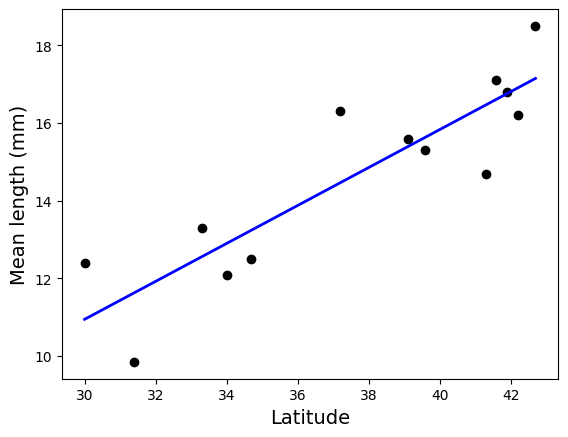

In [4]:
# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

Text(0, 0.5, 'Mean length (mm)')

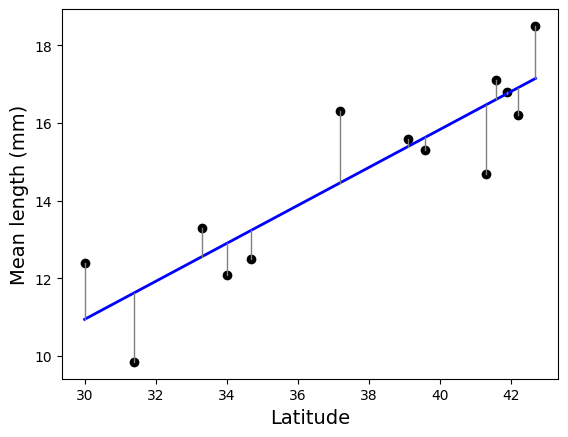

In [6]:
 #Graph the residuals
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPredicted[i]], color='grey', linewidth=1)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

In [8]:
# Output the intercept of the least squares regression
intercept = linModel.intercept_
print(intercept)
print(intercept[0])

[-3.70393483]
-3.7039348302831545


In [9]:
# Output the slope of the least squares regression
slope = linModel.coef_

print(slope)
print(slope[0][0])

[[0.48834592]]
0.48834591573349906


In [10]:
# Write the least squares model as an equation
print("Predicted mean length = ", intercept[0], " + ", slope[0][0], "* (latitude)")

Predicted mean length =  -3.7039348302831545  +  0.48834591573349906 * (latitude)


In [11]:
# Compute the sum of squared errors for the least squares model
SSEreg = sum((y - yPredicted) ** 2)[0]
SSEreg

np.float64(16.231931026452138)

In [12]:
# Compute the sum of squared errors for the horizontal line model
SSEyBar = sum((y - np.mean(y)) ** 2)[0]
SSEyBar

np.float64(72.94692307692308)

In [13]:
# Compute the proportion of variation explained by the linear regression
# using the sum of squared errors
(SSEyBar - SSEreg) / (SSEyBar)  #r-square

np.float64(0.7774829925405429)

In [14]:
print(y)

[[12.4 ]
 [ 9.85]
 [13.3 ]
 [12.1 ]
 [12.5 ]
 [16.3 ]
 [15.6 ]
 [15.3 ]
 [14.7 ]
 [17.1 ]
 [16.8 ]
 [16.2 ]
 [18.5 ]]


In [15]:
np.ravel(y)

array([12.4 ,  9.85, 13.3 , 12.1 , 12.5 , 16.3 , 15.6 , 15.3 , 14.7 ,
       17.1 , 16.8 , 16.2 , 18.5 ])

In [16]:
r = r_regression(X, np.ravel(y))[0]  #r-regression requires a simple 1d array for y. --> np.ravel is used for this.
#np.ravel --> flattens the target variable y into a 1 d array if y is multi-dimensional.
r

np.float64(0.8817499603291897)

In [17]:
# Compute the proportion of variation explained by the linear regression
# using correlation coefficient
r**2

np.float64(0.7774829925405277)

In [18]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
linModel.score(X, y)

0.7774829925405429